In [1]:
import gradio as gr # used to create web page
import tensorflow as tf
import numpy as np


In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

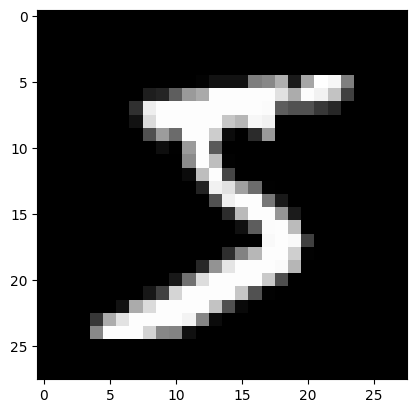

In [6]:
plt.imshow(x_train[0],cmap='gray')

In [7]:
x_train = x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [8]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

In [9]:
#Sequential provides us an empty comtainer to create neural network

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


C:\Users\khushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8659 - loss: 0.4998 - val_accuracy: 0.9762 - val_loss: 0.0921
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9762 - loss: 0.0823 - val_accuracy: 0.9767 - val_loss: 0.0815
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9847 - loss: 0.0519 - val_accuracy: 0.9815 - val_loss: 0.0616
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9891 - loss: 0.0373 - val_accuracy: 0.9828 - val_loss: 0.0562
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9921 - loss: 0.0276 - val_accuracy: 0.9852 - val_loss: 0.0531
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9939 - loss: 0.0200 - val_accuracy: 0.9840 - val_loss: 0.0581
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9958 - loss: 0.0146 - val_accuracy: 0.9847 - val_loss: 0.0571
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9973 - loss: 0.0109 - 

In [13]:
def sketch_recognization(img):
    
    x=model.predict(img.reshape(1,28,28)).argmax(axis=1)
    return x[0]

In [ ]:
interface=gr.Interface(fn=sketch_recognization,inputs='sketchpad',outputs='text')
interface.launch(debug=True)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\khushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\queueing.py", line 527, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\route_utils.py", line 261, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\blocks.py", line 1786, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\gradio\blocks.py", line 1338, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\khushi\AppData\Local\Programs\Python\Python312\Li